<a href="https://colab.research.google.com/github/Mauricio8583/Machine-Learning-Projects/blob/main/LSTMKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/82 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 1: val_loss improved from inf to 0.08410, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 2/100
78/82 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2: val_loss improved from 0.08410 to 0.08361, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 3/100
80/82 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3: val_loss improved from 0.08361 to 0.08292, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0829 - val_mean_squared_error: 0.0829
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.002

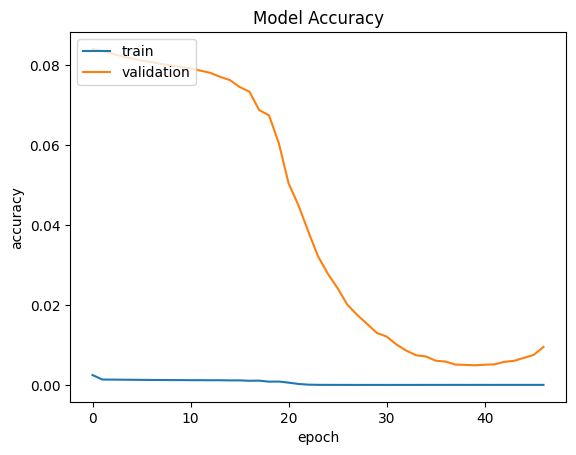

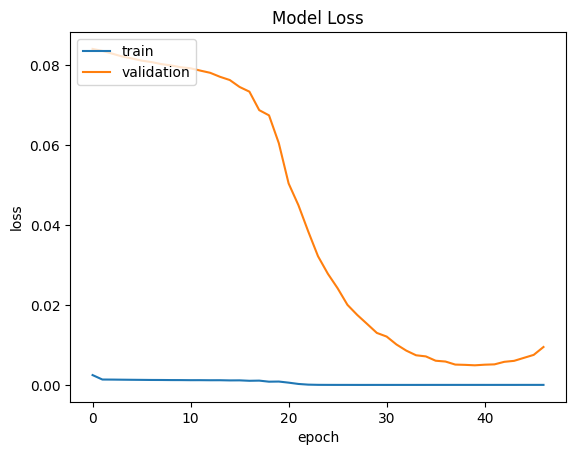

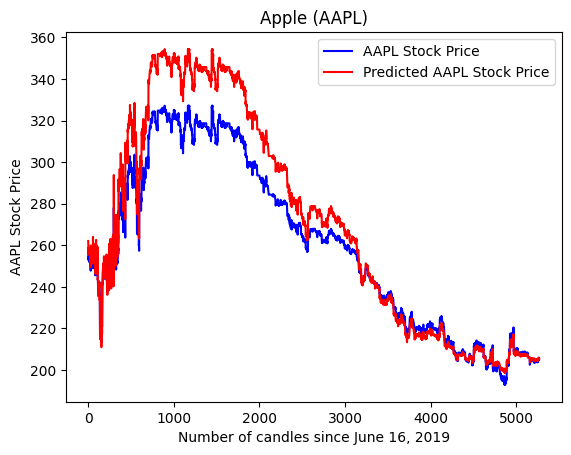

In [ ]:
from math import floor
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

hist = pd.read_csv('AAPL_data.csv', usecols=['Open'])

open = hist
amzn_values = open.values
amzn_values = amzn_values.reshape(-1, 1)

trainingScalar = MinMaxScaler(feature_range=(0,1))
amzn_values_scaled = trainingScalar.fit_transform(amzn_values)

training_split = floor(len(amzn_values_scaled) * 0.85)
training_amzn = amzn_values_scaled[0:training_split]
training_ind_amzn = []
training_dep_amzn = []

for i in range(50, len(training_amzn)):
  training_ind_amzn.append(training_amzn[i-50:i][0])
  training_dep_amzn.append(training_amzn[i][0])

training_ind_amzn, training_dep_amzn = np.array(training_ind_amzn), np.array(training_dep_amzn)
training_ind_amzn = np.reshape(training_ind_amzn, (training_ind_amzn.shape[0], training_ind_amzn.shape[1], 1))

amzn_model = Sequential()
amzn_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_amzn.shape[1], 1)))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(80, return_sequences=True))
amzn_model.add(Dropout(0.2))
amzn_model.add(LSTM(50))
amzn_model.add(Dropout(0.2))
amzn_model.add(Dense(25))
amzn_model.add(Dense(1))
amzn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = amzn_model.fit(training_ind_amzn, training_dep_amzn, epochs=100, batch_size=256, callbacks=[callback, checkpoint], validation_split=0.3, shuffle=False)

testing_input_amzn = amzn_values[training_split:]
testing_input_amzn = trainingScalar.fit_transform(testing_input_amzn)
testing_amzn = []

for i in range(50, len(testing_input_amzn) + 50):
  testing_amzn.append(testing_input_amzn[i-50:i][0])
testing_amzn = np.array(testing_amzn)
testing_amzn = np.reshape(testing_amzn, (testing_amzn.shape[0], testing_amzn.shape[1], 1))
predict_amzn = amzn_model.predict(testing_amzn)
predict_amzn = trainingScalar.inverse_transform(predict_amzn)

print(history.history.keys())

data_predicted = pd.DataFrame(predict_amzn)
data_predicted.to_csv('predict.csv', index=False)

graph_training = pd.DataFrame(history.history['val_loss'])
graph_training.to_csv('graph_training.csv', index=False)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(amzn_values[training_split:], color='blue', label='AAPL Stock Price')
plt.plot(predict_amzn, color='red', label='Predicted AAPL Stock Price')
plt.title('Apple (AAPL)')
plt.xlabel('Number of candles since June 16, 2019')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()